## IPython Notebooks

* You can run a cell by pressing ``[shift] + [Enter]`` or by pressing the "play" button in the menu.
* You can get help on a function or object by pressing ``[shift] + [tab]`` after the opening parenthesis ``function(``
* You can also get help by executing: ``function?``

We'll use the following standard imports.  Execute this cell first:

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

## Numpy refresher

NumPy arrays form the underlying data-structure for most computational work in Python, and is used extensively by Pandas underneath the hood.  Here, we give only a very brief overview.  See http://scipy-lectures.github.io/ for a more detailed lesson.

In [28]:
import numpy as np

# Generating a random array
X = np.random.random((3, 5))  # a 3 x 5 array

print(X)

[[ 0.85638745  0.20377704  0.85337137  0.93617308  0.68708019]
 [ 0.69351693  0.26113142  0.72097638  0.5146434   0.6605884 ]
 [ 0.57871646  0.29711588  0.93694272  0.36485267  0.03489225]]


### Pure Python arrays are slow: let's square a matrix

In [42]:
import random

vector_py = [random.random() for i in range(50000)]
vector_np = np.random.random(50000)

In [43]:
%timeit [e**2 for e in vector_py]

100 loops, best of 3: 8.04 ms per loop


In [44]:
%timeit vector_np**2

The slowest run took 6.52 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 35.1 µs per loop


In [45]:
8.04e-3 / 35.1e-6

229.05982905982907

### Accessing elements

In [46]:
# get a single element
X[0, 0]

0.85638745342108125

In [47]:
# get a row
X[1]

array([ 0.69351693,  0.26113142,  0.72097638,  0.5146434 ,  0.6605884 ])

In [48]:
# get a column
X[:, 1]

array([ 0.20377704,  0.26113142,  0.29711588])

In [49]:
# Transposing an array
X.T

array([[ 0.85638745,  0.69351693,  0.57871646],
       [ 0.20377704,  0.26113142,  0.29711588],
       [ 0.85337137,  0.72097638,  0.93694272],
       [ 0.93617308,  0.5146434 ,  0.36485267],
       [ 0.68708019,  0.6605884 ,  0.03489225]])

In [50]:
# Turning a row vector into a column vector
y = np.linspace(0, 12, 5)
y

array([  0.,   3.,   6.,   9.,  12.])

In [51]:
# make into a column vector
y[:, np.newaxis]

array([[  0.],
       [  3.],
       [  6.],
       [  9.],
       [ 12.]])

In [52]:
print(X.shape)
print(X.reshape(5, 3))

(3, 5)
[[ 0.85638745  0.20377704  0.85337137]
 [ 0.93617308  0.68708019  0.69351693]
 [ 0.26113142  0.72097638  0.5146434 ]
 [ 0.6605884   0.57871646  0.29711588]
 [ 0.93694272  0.36485267  0.03489225]]


In [53]:
# indexing by an array of integers (fancy indexing)
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[ 0.93617308,  0.20377704,  0.85638745],
       [ 0.5146434 ,  0.26113142,  0.69351693],
       [ 0.36485267,  0.29711588,  0.57871646]])

### Operations along an axis

In [54]:
X

array([[ 0.85638745,  0.20377704,  0.85337137,  0.93617308,  0.68708019],
       [ 0.69351693,  0.26113142,  0.72097638,  0.5146434 ,  0.6605884 ],
       [ 0.57871646,  0.29711588,  0.93694272,  0.36485267,  0.03489225]])

In [55]:
X.shape

(3, 5)

In [56]:
np.sum(X, axis=1)

array([ 3.53678914,  2.85085652,  2.21251998])

In [57]:
np.max(X, axis=0)

array([ 0.85638745,  0.29711588,  0.93694272,  0.93617308,  0.68708019])

# A quick-ish introduction to Pandas

Credit: this is a notebook cribbed from [the official "10 Minutes to Pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html).

<a href="http://pandas.pydata.org" target="_blank"> 
<img src="figures/pandas-book.jpg" style="float: left; width: 25%; margin-right: 2em;"></a>

* emphasis on tabular data (csv and the like)
* database/spreadsheet-like functionality
* rich support for mixed data (numpy is for homogeneous arrays)
* integrates cleanly with numpy and matplotlib

There is also a wonderful [set of free tutorials](https://bitbucket.org/hrojas/learn-pandas) on Pandas.

### Unlike NumPy, pandas is a *columnar data store*.

In [22]:
import pandas as pd
import seaborn as sns

# Let's also load the plotting/numerical tools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# make figures a bit larger by default
plt.rcParams['figure.figsize'] = (10,6)

## A quick taste of Pandas

Consider a standard stocks file you downloaded from [Yahoo Finance](http://finance.yahoo.com/q/hp?s=AAPL+Historical+Prices) (note that Pandas actually [ships with a utility to get that data for you](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-yahoo)):

In [27]:
!head data/AAPL.csv

Date,Open,High,Low,Close,Volume,Adj Close
2013-08-23,503.27,503.35,499.35,501.02,7877000,501.02
2013-08-22,504.98,505.59,498.20,502.96,8721700,502.96
2013-08-21,503.59,507.15,501.20,502.36,11995700,502.36
2013-08-20,509.71,510.57,500.82,501.07,12810300,501.07
2013-08-19,504.34,513.74,504.00,507.74,18232800,507.74
2013-08-16,500.15,502.94,498.86,502.33,12939500,502.33
2013-08-15,496.42,502.40,489.08,497.91,17510500,497.91
2013-08-14,497.88,504.25,493.40,498.50,27013300,498.50
2013-08-13,470.94,494.66,468.05,489.57,31497900,489.57


In [24]:
stock = pd.read_csv('data/AAPL.csv')
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2013-08-23,503.27,503.35,499.35,501.02,7877000,501.02
1,2013-08-22,504.98,505.59,498.20,502.96,8721700,502.96
2,2013-08-21,503.59,507.15,501.20,502.36,11995700,502.36
3,2013-08-20,509.71,510.57,500.82,501.07,12810300,501.07
4,2013-08-19,504.34,513.74,504.00,507.74,18232800,507.74


In [25]:
stock.index = stock.pop('Date')
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-08-23,503.27,503.35,499.35,501.02,7877000,501.02
2013-08-22,504.98,505.59,498.20,502.96,8721700,502.96
2013-08-21,503.59,507.15,501.20,502.36,11995700,502.36
2013-08-20,509.71,510.57,500.82,501.07,12810300,501.07
2013-08-19,504.34,513.74,504.00,507.74,18232800,507.74


In [14]:
stock.sort(inplace=True)
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1996-01-02,32.25,32.25,31.75,32.13,4983200,7.81
1996-01-03,32.00,32.88,31.87,32.13,15368800,7.81
1996-01-04,32.38,32.38,31.37,31.56,10721200,7.67
1996-01-05,31.62,34.25,31.37,34.25,15929200,8.33
1996-01-08,34.50,35.50,34.00,34.63,4341200,8.42


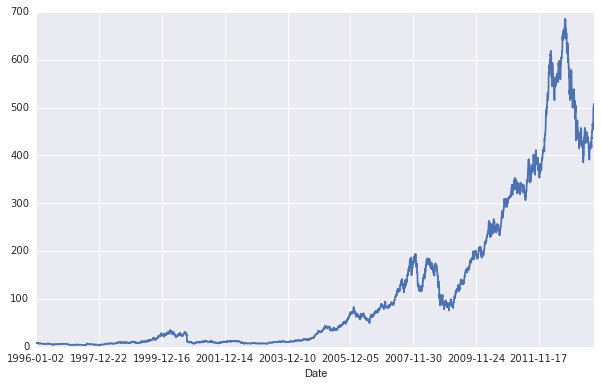

In [15]:
stock['Adj Close'].plot();

In [94]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))  # just more than a year

rdf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
rdf.head()

,A,B,C,D
2000-01-01,0.322330,0.768993,2.249961,-0.262111
2000-01-02,-0.102684,0.190375,-1.471382,0.597893
2000-01-03,1.989923,0.273032,-0.188176,-1.976469
2000-01-04,-0.901770,0.396484,-1.144343,0.539260
2000-01-05,0.406112,-0.182979,-1.087188,-0.557239


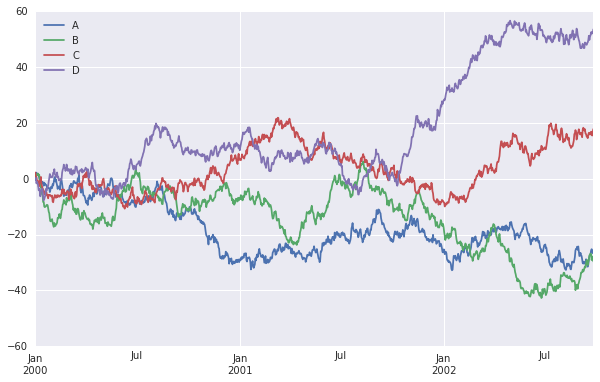

In [97]:
rdf.cumsum().plot();

## Object creation

See the [Data Structure Intro](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) section for more details.

Creating a Series by passing a list of values, letting pandas create a default integer index

In [16]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

### Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

In [20]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [21]:
rng = np.random.RandomState()

df = pd.DataFrame(rng.normal(size=(6, 4)), index=dates, columns=('rainfall', 'temp', 'humidity', 'windchill'))
df

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-06,0.295708,0.223515,-0.156662,-0.897845


## Viewing Data

In [22]:
df.head()

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-05,-0.454762,0.368893,-0.314506,1.455401


In [23]:
df.tail(3)

,rainfall,temp,humidity,windchill
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-06,0.295708,0.223515,-0.156662,-0.897845


Display the index,columns, and the underlying numpy data

In [24]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [25]:
df.columns

Index(['rainfall', 'temp', 'humidity', 'windchill'], dtype='object')

In [26]:
df.values

array([[ 0.30748348,  0.04260112,  0.27170732, -1.62037702],
       [ 0.42379999, -0.66542967,  0.08179128, -0.35733301],
       [ 1.12048335,  1.67051232, -1.0916368 ,  0.19466055],
       [-2.41632692,  1.91494805, -1.61258502,  0.11331722],
       [-0.45476237,  0.36889338, -0.31450615,  1.45540068],
       [ 0.29570838,  0.22351487, -0.15666216, -0.8978446 ]])

Describe shows a quick statistic summary of your data

In [27]:
df.describe()

,rainfall,temp,humidity,windchill
count,6.000000,6.000000,6.000000,6.000000
mean,-0.120602,0.592507,-0.470315,-0.185363
std,1.230874,0.998189,0.730602,1.050924
min,-2.416327,-0.665430,-1.612585,-1.620377
25%,-0.267145,0.087830,-0.897354,-0.762717
50%,0.301596,0.296204,-0.235584,-0.122008
75%,0.394721,1.345108,0.022178,0.174325
max,1.120483,1.914948,0.271707,1.455401


Transposing your data

In [38]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
rainfall,0.307483,0.423800,1.120483,-2.416327,-0.454762,0.295708
temp,0.042601,-0.665430,1.670512,1.914948,0.368893,0.223515
humidity,0.271707,0.081791,-1.091637,-1.612585,-0.314506,-0.156662
windchill,-1.620377,-0.357333,0.194661,0.113317,1.455401,-0.897845


Sorting by an axis

In [39]:
df.sort_index(ascending=False)

,rainfall,temp,humidity,windchill
2013-01-06,0.295708,0.223515,-0.156662,-0.897845
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-01,0.307483,0.042601,0.271707,-1.620377


Sorting by values

In [40]:
df.sort(columns='temp')

,rainfall,temp,humidity,windchill
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-06,0.295708,0.223515,-0.156662,-0.897845
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-04,-2.416327,1.914948,-1.612585,0.113317


## Selection

**Note** While many of the NumPy access methods work on DataFrames, use the pandas-specific data access methods, `.at`, `.iat`, `.loc`, `.iloc` and `.ix`.

See the [Indexing section](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and below.

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.rainfall`

In [41]:
df['rainfall']

2013-01-01    0.307483
2013-01-02    0.423800
2013-01-03    1.120483
2013-01-04   -2.416327
2013-01-05   -0.454762
2013-01-06    0.295708
Freq: D, Name: rainfall, dtype: float64

Selecting via `[]`, which slices the rows.

In [42]:
df[:3]

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661


### Selection by Label

In [43]:
df.loc['20130101':'20130103']

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661


See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label).

For getting a cross section using a label

In [44]:
df.loc[dates[0]]

rainfall     0.307483
temp         0.042601
humidity     0.271707
windchill   -1.620377
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [47]:
df.loc[:, ['rainfall', 'temp']]

,rainfall,temp
2013-01-01,0.307483,0.042601
2013-01-02,0.423800,-0.665430
2013-01-03,1.120483,1.670512
2013-01-04,-2.416327,1.914948
2013-01-05,-0.454762,0.368893
2013-01-06,0.295708,0.223515


### Selection by Position

Select via the position of the passed integers—esentially equivalent to NumPy indexing.

In [48]:
df.iloc[3]

rainfall    -2.416327
temp         1.914948
humidity    -1.612585
windchill    0.113317
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [49]:
df.iloc[3:5, 0:2]

,rainfall,temp
2013-01-04,-2.416327,1.914948
2013-01-05,-0.454762,0.368893


By lists of integer position locations, similar to the numpy/python style

In [50]:
df.iloc[[1,2,4], [0,2]]

,rainfall,humidity
2013-01-02,0.423800,0.081791
2013-01-03,1.120483,-1.091637
2013-01-05,-0.454762,-0.314506


For slicing rows or columns explicitly

In [51]:
df.iloc[1:3, :]

,rainfall,temp,humidity,windchill
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661


### Boolean Indexing

In [52]:
df

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-06,0.295708,0.223515,-0.156662,-0.897845


In [53]:
df[df.rainfall > 0]

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-06,0.295708,0.223515,-0.156662,-0.897845


What happens if I select on the whole table?

In [54]:
df[df > 0]

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,NaN
2013-01-02,0.423800,NaN,0.081791,NaN
2013-01-03,1.120483,1.670512,NaN,0.194661
2013-01-04,NaN,1.914948,NaN,0.113317
2013-01-05,NaN,0.368893,NaN,1.455401
2013-01-06,0.295708,0.223515,NaN,NaN


## Basic operations

Simple statistics

In [55]:
df.mean()

rainfall    -0.120602
temp         0.592507
humidity    -0.470315
windchill   -0.185363
dtype: float64

And the same along a different axis:

In [56]:
df.mean(axis=1)

2013-01-01   -0.249646
2013-01-02   -0.129293
2013-01-03    0.473505
2013-01-04   -0.500162
2013-01-05    0.263756
2013-01-06   -0.133821
Freq: D, dtype: float64

Applying a function to the data

In [58]:
print(df)
df.apply(np.cumsum)

            rainfall      temp  humidity  windchill
2013-01-01  0.307483  0.042601  0.271707  -1.620377
2013-01-02  0.423800 -0.665430  0.081791  -0.357333
2013-01-03  1.120483  1.670512 -1.091637   0.194661
2013-01-04 -2.416327  1.914948 -1.612585   0.113317
2013-01-05 -0.454762  0.368893 -0.314506   1.455401
2013-01-06  0.295708  0.223515 -0.156662  -0.897845


,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.731283,-0.622829,0.353499,-1.977710
2013-01-03,1.851767,1.047684,-0.738138,-1.783049
2013-01-04,-0.564560,2.962632,-2.350723,-1.669732
2013-01-05,-1.019322,3.331525,-2.665229,-0.214332
2013-01-06,-0.723614,3.555040,-2.821892,-1.112176


In [59]:
df.apply(lambda column: column.max() - column.min())

rainfall     3.536810
temp         2.580378
humidity     1.884292
windchill    3.075778
dtype: float64

## SQL-style joins (merging data)

In [64]:
left = pd.DataFrame({'subject': ['history', 'literature'], 'papers': [10, 20]})
right = pd.DataFrame({'subject': ['history', 'literature', 'science'], 'books': [4, 5, 9]})

In [65]:
left

,papers,subject
0,10,history
1,20,literature


In [62]:
right

,books,subject
0,4,history
1,5,literature
2,9,science


In [67]:
pd.merge(left, right, on='subject', how='outer')

,papers,subject,books
0,10,history,4
1,20,literature,5
2,NaN,science,9


Above, `how` can be:

  * left: use only keys from left frame (SQL: left outer join)
  * right: use only keys from right frame (SQL: right outer join)
  * outer: use union of keys from both frames (SQL: full outer join)
  * inner: use intersection of keys from both frames (SQL: inner join)

## Append rows to a dataframe

In [69]:
#df = pd.DataFrame(np.arange(4 * 3).reshape((4, 3)), columns=['A','B','C'])
df

,rainfall,temp,humidity,windchill
2013-01-01,0.307483,0.042601,0.271707,-1.620377
2013-01-02,0.423800,-0.665430,0.081791,-0.357333
2013-01-03,1.120483,1.670512,-1.091637,0.194661
2013-01-04,-2.416327,1.914948,-1.612585,0.113317
2013-01-05,-0.454762,0.368893,-0.314506,1.455401
2013-01-06,0.295708,0.223515,-0.156662,-0.897845


In [70]:
#s = df.iloc[2]
#s

In [71]:
df.append(df.iloc[0], ignore_index=True)

,rainfall,temp,humidity,windchill
0,0.307483,0.042601,0.271707,-1.620377
1,0.423800,-0.665430,0.081791,-0.357333
2,1.120483,1.670512,-1.091637,0.194661
3,-2.416327,1.914948,-1.612585,0.113317
4,-0.454762,0.368893,-0.314506,1.455401
5,0.295708,0.223515,-0.156662,-0.897845
6,0.307483,0.042601,0.271707,-1.620377


In [73]:
row = pd.DataFrame([[0, 1, 2, 3]], columns=df.columns, index=['2015-08-19'])
df.append(row)

,rainfall,temp,humidity,windchill
2013-01-01 00:00:00,0.307483,0.042601,0.271707,-1.620377
2013-01-02 00:00:00,0.423800,-0.665430,0.081791,-0.357333
2013-01-03 00:00:00,1.120483,1.670512,-1.091637,0.194661
2013-01-04 00:00:00,-2.416327,1.914948,-1.612585,0.113317
2013-01-05 00:00:00,-0.454762,0.368893,-0.314506,1.455401
2013-01-06 00:00:00,0.295708,0.223515,-0.156662,-0.897845
2015-08-19,0.000000,1.000000,2.000000,3.000000


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) for more.

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : range(8),
                   'D' : range(10, 18)})
df

,A,B,C,D
0,foo,one,0,10
1,bar,one,1,11
2,foo,two,2,12
3,bar,three,3,13
4,foo,two,4,14
5,bar,two,5,15
6,foo,one,6,16
7,foo,three,7,17


Grouping and then applying a function sum to the resulting groups.

In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,9,39
foo,19,69


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [76]:
df.groupby(['A', 'B']).sum()

C   D
A   B           
bar one    1  11
    three  3  13
    two    5  15
foo one    6  26
    three  7  17
    two    6  26

In [77]:
g = df.groupby('A')

In [78]:
g.*?

```
g.A            g.B            g.C            g.D            g.agg          g.aggregate    
g.all          g.any          g.apply        g.bfill        g.boxplot      g.corr         
g.corrwith     g.count        g.cov          g.cumcount     g.cummax       g.cummin       
g.cumprod      g.cumsum       g.describe     g.diff         g.dtypes       g.ffill        
g.fillna       g.filter       g.first        g.get_group    g.groups       g.head         
g.hist         g.idxmax       g.idxmin       g.indices      g.irow         g.last         
g.mad          g.max          g.mean         g.median       g.min          g.name         
g.ngroups      g.nth          g.ohlc         g.pct_change   g.plot         g.prod         
g.quantile     g.rank         g.resample     g.sem          g.shift        g.size         
g.skew         g.std          g.sum          g.tail         g.take         g.transform    
g.tshift       g.var          
```

## Histogramming

In [86]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    5
2    2
3    5
4    3
5    0
6    0
7    6
8    0
9    5
dtype: int64

In [87]:
s.value_counts()

5    3
0    3
6    2
3    1
2    1
dtype: int64